# **IDM Movie Recommendation System**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
path_movies = 'C:/dataset/recomendation_sys/movies/movies.csv'
path_ratings = 'C:/dataset/recomendation_sys/movies/ratings.csv'

movies = pd.read_csv(path_movies, sep=',') 
ratings = pd.read_csv(path_ratings, sep=',')

In [3]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [4]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807


In [5]:
print('movies:', movies.shape)
print('ratings:', ratings.shape)

movies: (10329, 3)
ratings: (105339, 4)


In [6]:
movies = movies.rename(index=str, columns={'movieId': 'movie_id'})
ratings = ratings.rename(index=str, columns={'userId': 'user_id', 'movieId': 'movie_id'})

In [7]:
movies = movies.merge(ratings, on='movie_id')

In [8]:
movies.head(2)

,movie_id,title,genres,user_id,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039


Index(['Pulp Fiction (1994)', 'Forrest Gump (1994)',
       'Shawshank Redemption, The (1994)', 'Jurassic Park (1993)',
       'Silence of the Lambs, The (1991)',
       'Star Wars: Episode IV - A New Hope (1977)', 'Matrix, The (1999)',
       'Terminator 2: Judgment Day (1991)', 'Braveheart (1995)',
       'Schindler's List (1993)',
       ...
       'The Aztec Mummy Against the Humanoid Robot (1958)',
       'Talking About Sex (1994)', 'North to Alaska (1960)',
       'Fullmetal Alchemist: The Sacred Star of Milos (2011)',
       'Action in the North Atlantic (1943)', 'Edge of Seventeen (1998)',
       'Hunchback of Notre Dame, The (Notre Dame de Paris) (1956)',
       'The Road Within (2014)', 'Salem's Lot (1979)',
       'Sergeant Rutledge (1960)'],
      dtype='object', length=10323)

In [20]:
vote_count = movies['title'].value_counts().values
titles = movies['title'].value_counts().keys()

In [27]:
titles_votes = pd.DataFrame([titles, vote_count]).T

In [29]:
titles_votes = titles_votes.rename(index=str, columns={0: 'title', 1: 'num_vote'})

In [30]:
movies = movies.merge(titles_votes, on='title')

In [32]:
movies[movies.genres == '(no genres listed)']

,movie_id,title,genres,user_id,rating,timestamp,num_vote
105063,126929,Li'l Quinquin ( ),(no genres listed),668,2.0,1436668178,1
105239,135460,Pablo (2012),(no genres listed),475,3.5,1441965768,1
105278,138863,The Big Broadcast of 1936 (1935),(no genres listed),668,2.0,1438052429,1
105306,141305,Round Trip to Heaven (1992),(no genres listed),164,4.0,1440814069,1
105308,141472,The 50 Year Argument (2014),(no genres listed),668,2.5,1442679119,1
105323,143709,The Take (2009),(no genres listed),475,3.5,1450606399,1
105338,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed),475,4.0,1451223429,1


In [39]:
movies.genres.iloc[105063] = 'Drama|Mistery'
movies.genres.iloc[105239] = 'Documentary|Animation'
movies.genres.iloc[105278] = 'Musical|Comedy'
movies.genres.iloc[105306] = 'Comedy'
movies.genres.iloc[105308] = 'Documentary'
movies.genres.iloc[105323] = 'Drama'
movies.genres.iloc[105338] = 'Drama'

In [42]:
movies.head()

,movie_id,title,genres,user_id,rating,timestamp,num_vote
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895,232
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039,232
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933,232
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810,232
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286,232


In [46]:
V = movies['num_vote']
R = movies['rating']
C = movies['rating'].mean()
m = movies['num_vote'].quantile(0.7)

movies['weight_avg'] = (V/(V+m) * R) + (m/(m+V) * C)

In [47]:
movies.head()

,movie_id,title,genres,user_id,rating,timestamp,num_vote,weight_avg
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895,232,4.64873
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039,232,3.88557
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933,232,4.64873
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810,232,3.88557
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286,232,3.88557


**RECOMENDATIONS v1**

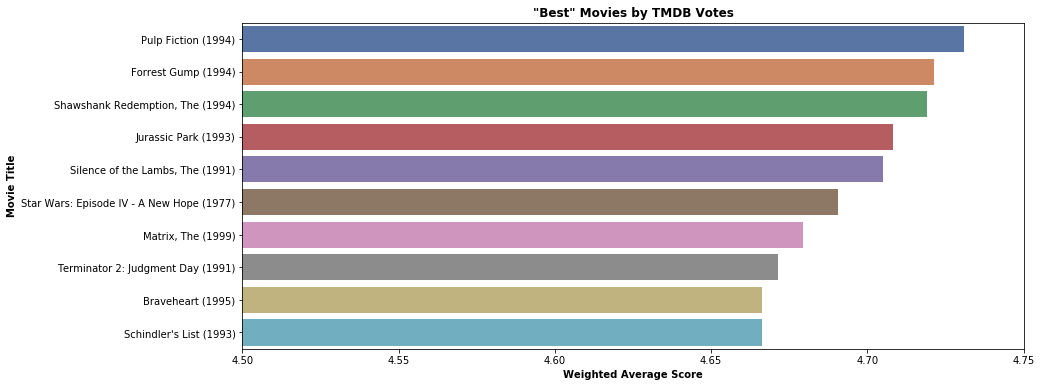

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

movie_rank = movies[['title', 'weight_avg']].sort_values(by='weight_avg', ascending=False).drop_duplicates()

plt.figure(figsize=(14,6))

ax = sns.barplot(x=movie_rank['weight_avg'].head(10), y=movie_rank['title'].head(10), data=movie_rank, palette='deep')

plt.xlim(4.5, 4.75)
plt.title('"Best" Movies by TMDB Votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.show()
